Estadísticas calculadas (promedio, varianza, desviación estándar):
                script  tiempo_promedio  tiempo_varianza  tiempo_std  \
0  Precision_simple.jl            0.962            0.001       0.036   
1   Precisión_doble.jl            1.111            0.032       0.180   

   energia_promedio  energia_varianza  energia_std  
0             9.821             0.662        0.814  
1            11.205             3.542        1.882  


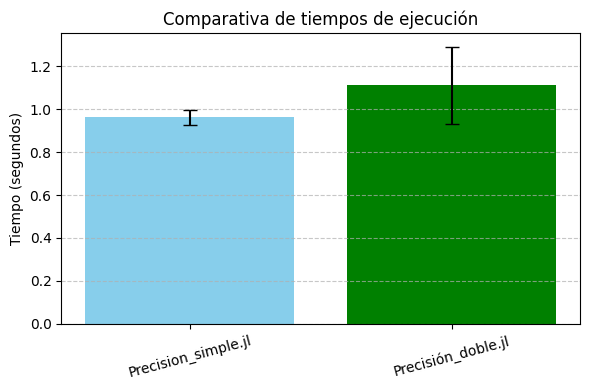

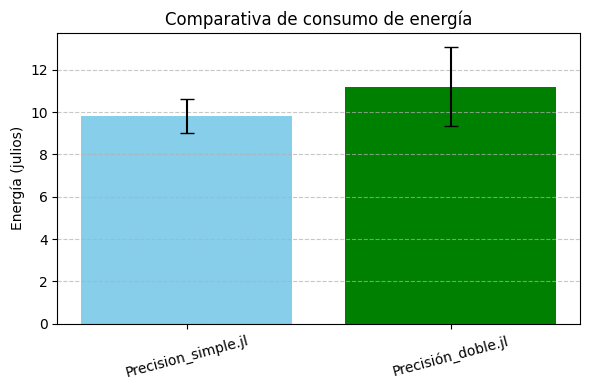

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === Leer CSV ===
df = pd.read_csv("resultados_energia_iter500.csv")

# === Filtrar solo scripts deseados ===
scripts_filtrados = ["Precision_simple.jl", "Precisión_doble.jl"]
df = df[df["script"].isin(scripts_filtrados)]

# === Agrupar por script y calcular estadísticas ===
stats = df.groupby("script").agg({
    "tiempo_s(segundos)": ["mean", "var", "std"],
    "energia_j(julios)": ["mean", "var", "std"]
})

# Resetear índice y renombrar columnas
stats = stats.reset_index()
stats.columns = ["script",
                 "tiempo_promedio", "tiempo_varianza", "tiempo_std",
                 "energia_promedio", "energia_varianza", "energia_std"]

# Redondear para visualización
for col in stats.columns[1:]:
    stats[col] = stats[col].round(3)

print("Estadísticas calculadas (promedio, varianza, desviación estándar):")
print(stats)

# === Gráfica comparativa de tiempos (con barras de error) ===
plt.figure(figsize=(6, 4))
plt.bar(stats["script"], stats["tiempo_promedio"],
        yerr=stats["tiempo_std"], capsize=5,
        color=["skyblue", "green"])
plt.ylabel("Tiempo (segundos)")
plt.title("Comparativa de tiempos de ejecución")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.savefig("comparativa_tiempos.png")
plt.show()

# === Gráfica comparativa de energía (con barras de error) ===
plt.figure(figsize=(6, 4))
plt.bar(stats["script"], stats["energia_promedio"],
        yerr=stats["energia_std"], capsize=5,
        color=["skyblue", "green"])
plt.ylabel("Energía (julios)")
plt.title("Comparativa de consumo de energía")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.savefig("comparativa_energia.png")
plt.show()


Estadísticas calculadas (promedio, varianza, desviación estándar):
                script  tiempo_promedio  tiempo_varianza  tiempo_std  \
0  Precision_simple.jl            0.962            0.001       0.036   
1   Precisión_doble.jl            1.111            0.032       0.180   

   energia_promedio  energia_varianza  energia_std  
0             9.821             0.662        0.814  
1            11.205             3.542        1.882  


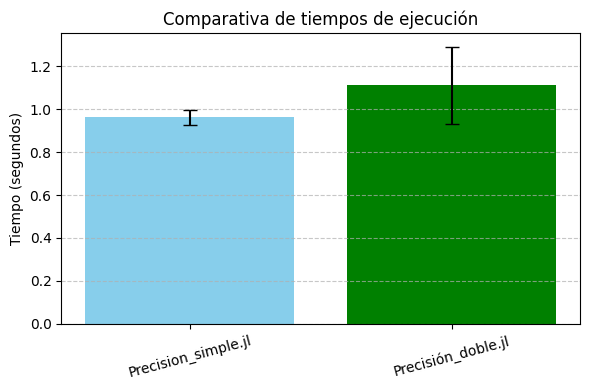

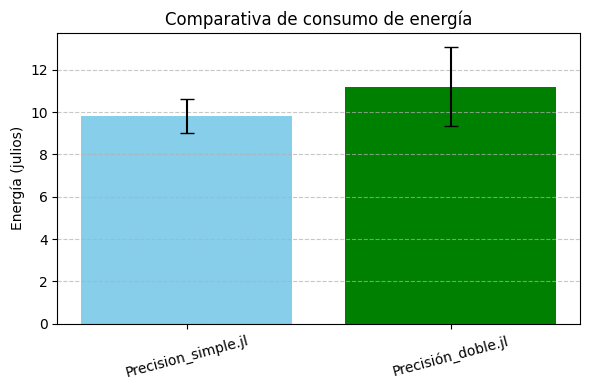

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === Leer CSV ===
df = pd.read_csv("resultados_energia_iter500.csv")

# === Filtrar solo scripts deseados ===
scripts_filtrados = ["Precision_simple.jl", "Precisión_doble.jl"]
df = df[df["script"].isin(scripts_filtrados)]

# === Agrupar por script y calcular estadísticas ===
stats = df.groupby("script").agg({
    "tiempo_s(segundos)": ["mean", "var", "std"],
    "energia_j(julios)": ["mean", "var", "std"]
})

# Resetear índice y renombrar columnas
stats = stats.reset_index()
stats.columns = ["script",
                 "tiempo_promedio", "tiempo_varianza", "tiempo_std",
                 "energia_promedio", "energia_varianza", "energia_std"]

# Redondear para visualización
for col in stats.columns[1:]:
    stats[col] = stats[col].round(3)

print("Estadísticas calculadas (promedio, varianza, desviación estándar):")
print(stats)

# === Gráfica comparativa de tiempos (con barras de error) ===
plt.figure(figsize=(6, 4))
plt.bar(stats["script"], stats["tiempo_promedio"],
        yerr=stats["tiempo_std"], capsize=5,
        color=["skyblue", "green"])
plt.ylabel("Tiempo (segundos)")
plt.title("Comparativa de tiempos de ejecución")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.savefig("comparativa_tiempos.png")
plt.show()

# === Gráfica comparativa de energía (con barras de error) ===
plt.figure(figsize=(6, 4))
plt.bar(stats["script"], stats["energia_promedio"],
        yerr=stats["energia_std"], capsize=5,
        color=["skyblue", "green"])
plt.ylabel("Energía (julios)")
plt.title("Comparativa de consumo de energía")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# plt.savefig("comparativa_energia.png")
plt.show()


                script  tiempo_promedio  tiempo_varianza  energia_promedio  \
0  Precision_simple.jl         0.960003         0.000008          9.731871   
1   Precisión_doble.jl         1.077888         0.000032         10.835139   

   energia_varianza  
0          0.108326  
1          0.149459  


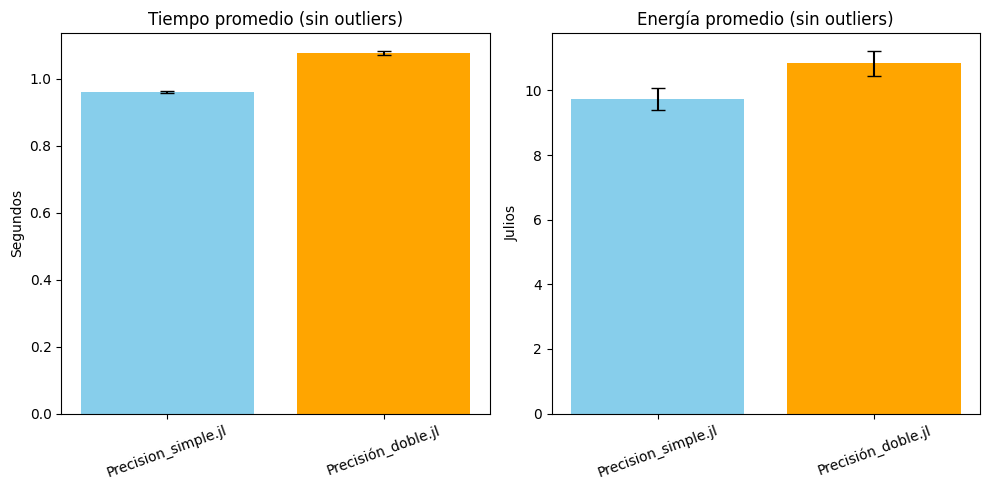

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer CSV
df = pd.read_csv("resultados_energia_iter500.csv")

# Renombrar columnas para simplificar
df = df.rename(columns={
    "tiempo_s(segundos)": "tiempo_s",
    "energia_j(julios)": "energia_j"
})

# Filtrar solo scripts deseados
scripts_filtrados = ["Precision_simple.jl", "Precisión_doble.jl"]
df = df[df["script"].isin(scripts_filtrados)]

# Función para quitar outliers
def remove_outliers_iqr(df, columnas):
    df_clean = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Limpiar outliers
df_clean = remove_outliers_iqr(df, ["tiempo_s", "energia_j"])

# Calcular estadísticas por script
df_stats = df_clean.groupby("script")[["tiempo_s", "energia_j"]].agg(['mean', 'var']).reset_index()
df_stats.columns = ['script', 'tiempo_promedio', 'tiempo_varianza', 'energia_promedio', 'energia_varianza']

print(df_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Tiempo promedio
axes[0].bar(df_stats["script"], df_stats["tiempo_promedio"], yerr=df_stats["tiempo_varianza"]**0.5, color=["skyblue","orange"], capsize=5)
axes[0].set_title("Tiempo promedio (sin outliers)")
axes[0].set_ylabel("Segundos")
axes[0].tick_params(axis='x', rotation=20)

# Energía promedio
axes[1].bar(df_stats["script"], df_stats["energia_promedio"], yerr=df_stats["energia_varianza"]**0.5, color=["skyblue","orange"], capsize=5)
axes[1].set_title("Energía promedio (sin outliers)")
axes[1].set_ylabel("Julios")
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


In [8]:
# Cantidad de filas original
n_original = len(df)

# Limpiar outliers
df_clean = remove_outliers_iqr(df, ["tiempo_s", "energia_j"])

# Cantidad de filas después de eliminar outliers
n_limpio = len(df_clean)

# Número de elementos eliminados
n_eliminados = n_original - n_limpio

print(f"Filas originales: {n_original}")
print(f"Filas después de quitar outliers: {n_limpio}")
print(f"Filas eliminadas: {n_eliminados}")


Filas originales: 958
Filas después de quitar outliers: 882
Filas eliminadas: 76
